# Práctica I - Auditoría de Datos
- Tomás Daniel Expósito Torre
- David Sanz Gómez

## Ejercicio I - Estudio de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

LABELS=0
VALUES=1

# Read CSV, ignore empty columns
df = pd.read_csv(
    "datos_practica.txt",
    sep="|", header=None, skipinitialspace=True
)

df.columns = [
    "FECHA TRANSACCION", "HORA TRANSACCION", "CLIENTE ID", "PERFIL CLIENTE", "SEGMENTO", "IP",
    "MODO ACCESO", "ID SESION", "IMPORTE", "TIPO MENSAJE", "CANAL", "FECHA SESION", "HORA SESION",
    "MEDIO AUTENTIFICACION", "TIPO TRANSACCION", "ENTIDAD", "OFICINA ORIGEN", "CUENTA ORIGEN",
    "ENTIDAD DESTINO", "OFICINA DESTINO", "CUENTA DESTINO", "TIPO FIRMA", "TIPO CUENTA ORIGEN",
    "PAIS DESTINO", "FECHA ALTA CANAL", "FECHA ACTIVACION CANAL", "FECHA NAC TITU CTA CARGO",
    "FECHA ALTA CTA CARGO", "PAIS IP", "LATITUD", "LONGITUD", "BROWSER", "BROWSER VERSION", "OS",
    "OS VERSION", "PROFESION CLIENTE", "SECTOR CLIENTE", "SEGMENTO CLIENTE", "INDICADOR FRAUDE"
]

# Parse dates and hours
dates = ["FECHA TRANSACCION", "FECHA SESION", "FECHA ALTA CANAL", "FECHA ACTIVACION CANAL",
         "FECHA NAC TITU CTA CARGO", "FECHA ALTA CTA CARGO"]
hours = ["HORA TRANSACCION", "HORA SESION"]

for column in dates:
    df[column] = pd.to_datetime(df[column], format="%Y%m%d")

df["HORA TRANSACCION"] =  df["HORA TRANSACCION"] // 10000 # Remove minutes and seconds from time
df["HORA SESION"] =  df["HORA SESION"] // 10000 # Remove minutes and seconds from time

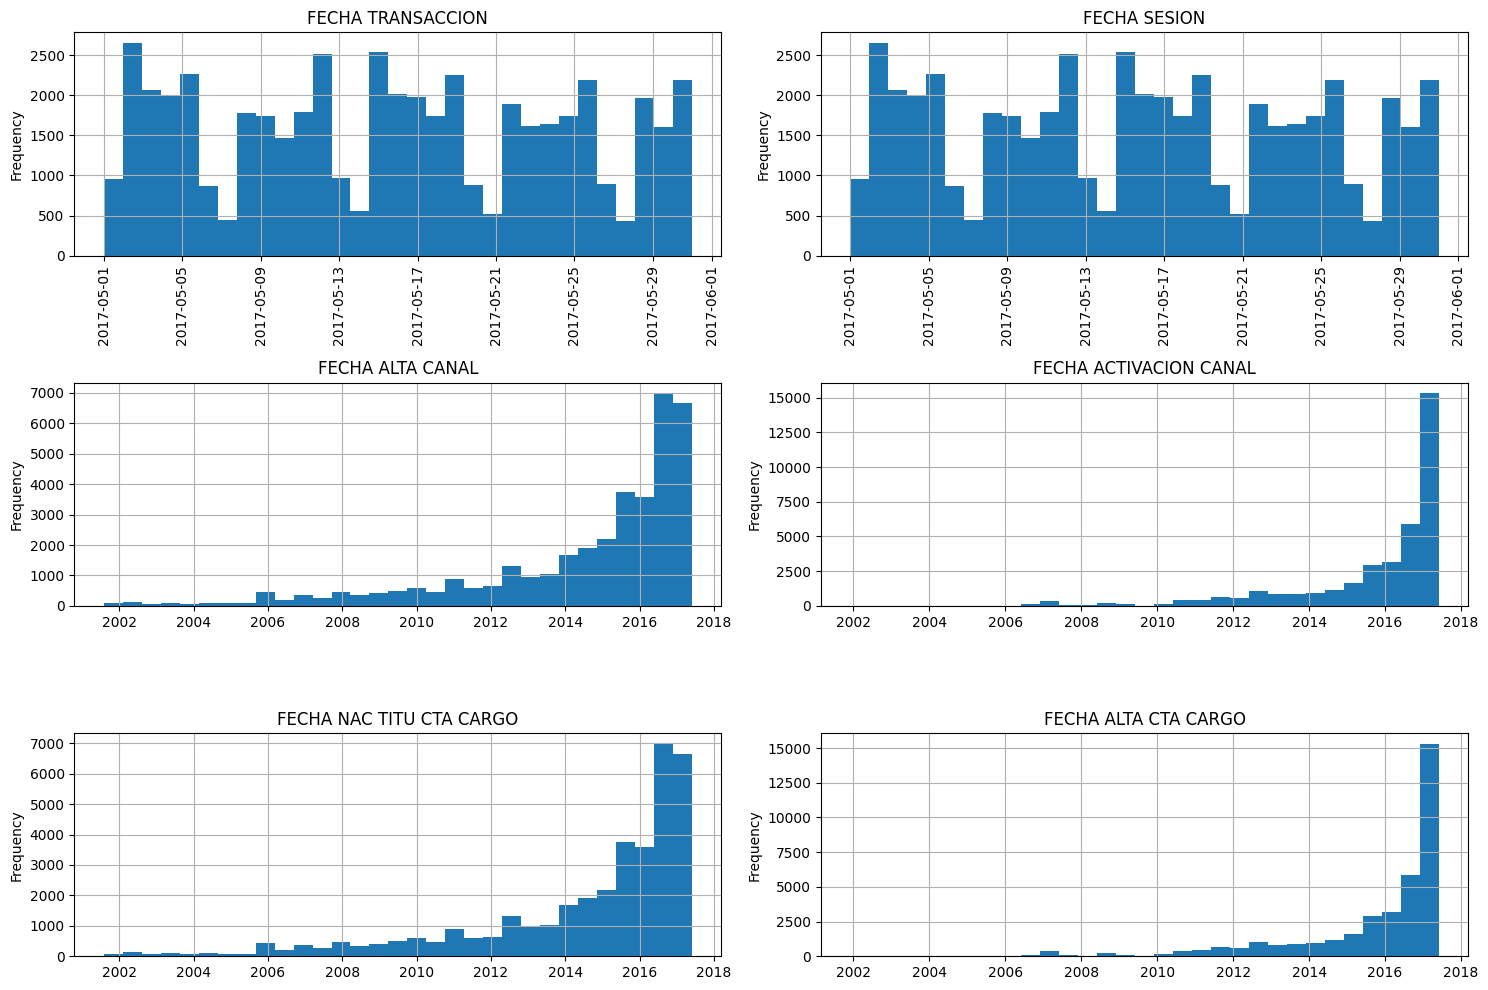

In [2]:
# Plot Dates
fig, axes = plt.subplots(3,2, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    ax.hist(df[dates[i]], bins=31)
    ax.set_title(dates[i])
    ax.set_ylabel("Frequency")
    ax.grid(True)
    if i < 2:
        for tick in ax.get_xticklabels():
            tick.set_rotation(90) # For readability on 2017-XX-XX records

plt.tight_layout()
plt.show()

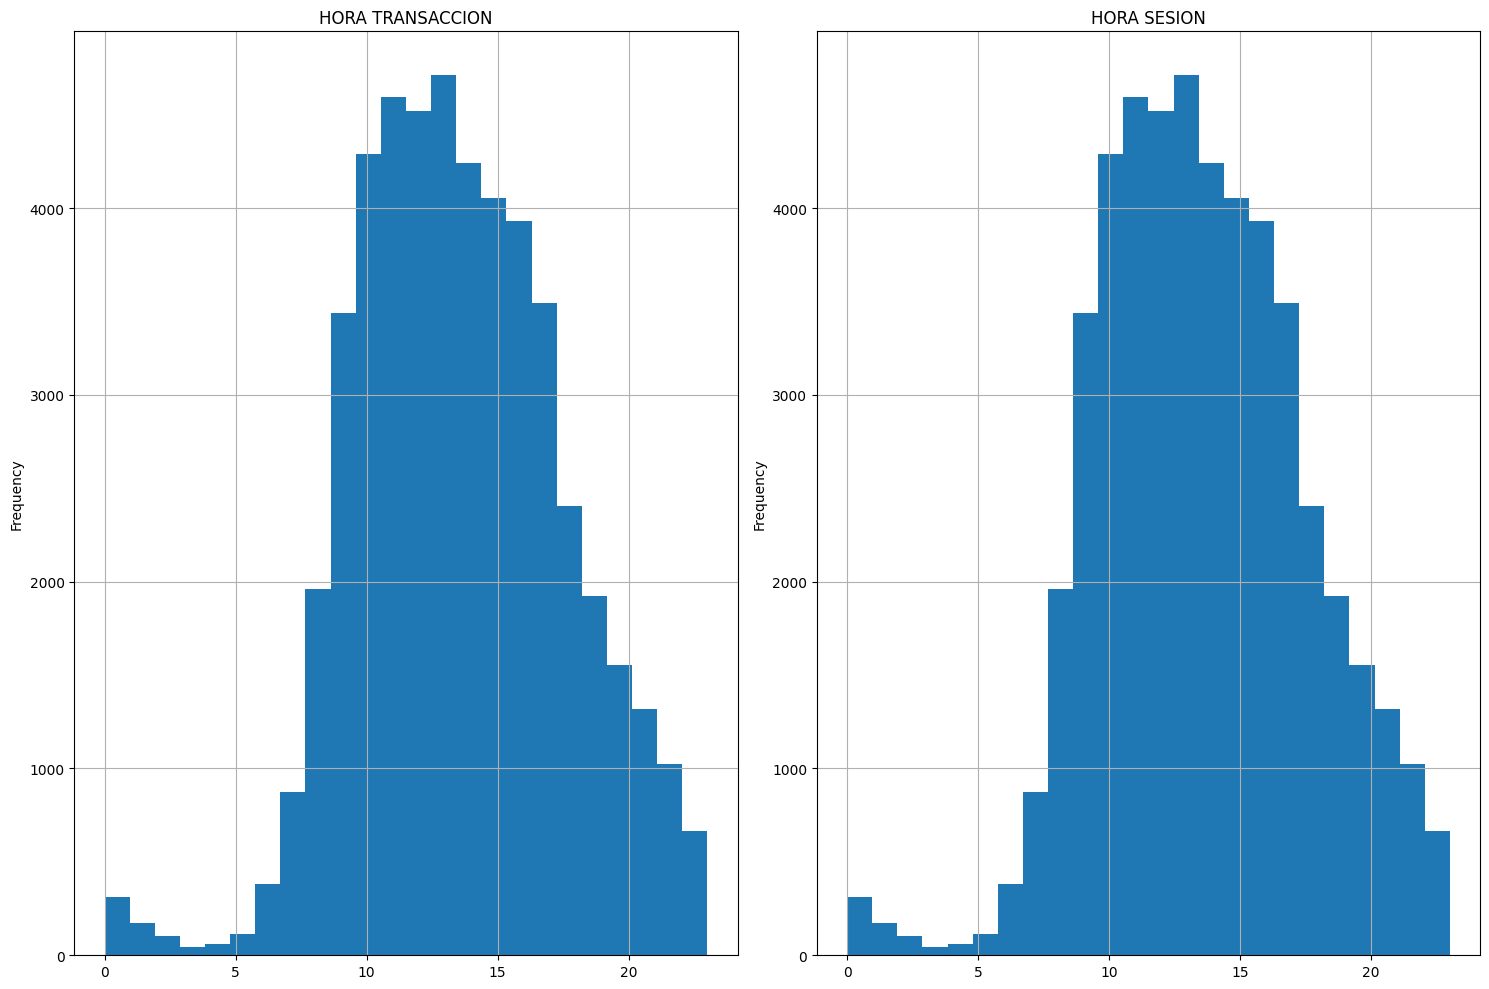

In [3]:
# Plot Hours
fig, axes = plt.subplots(1,2, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    ax.hist(df[hours[i]], bins=24)
    ax.set_title(hours[i])
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()

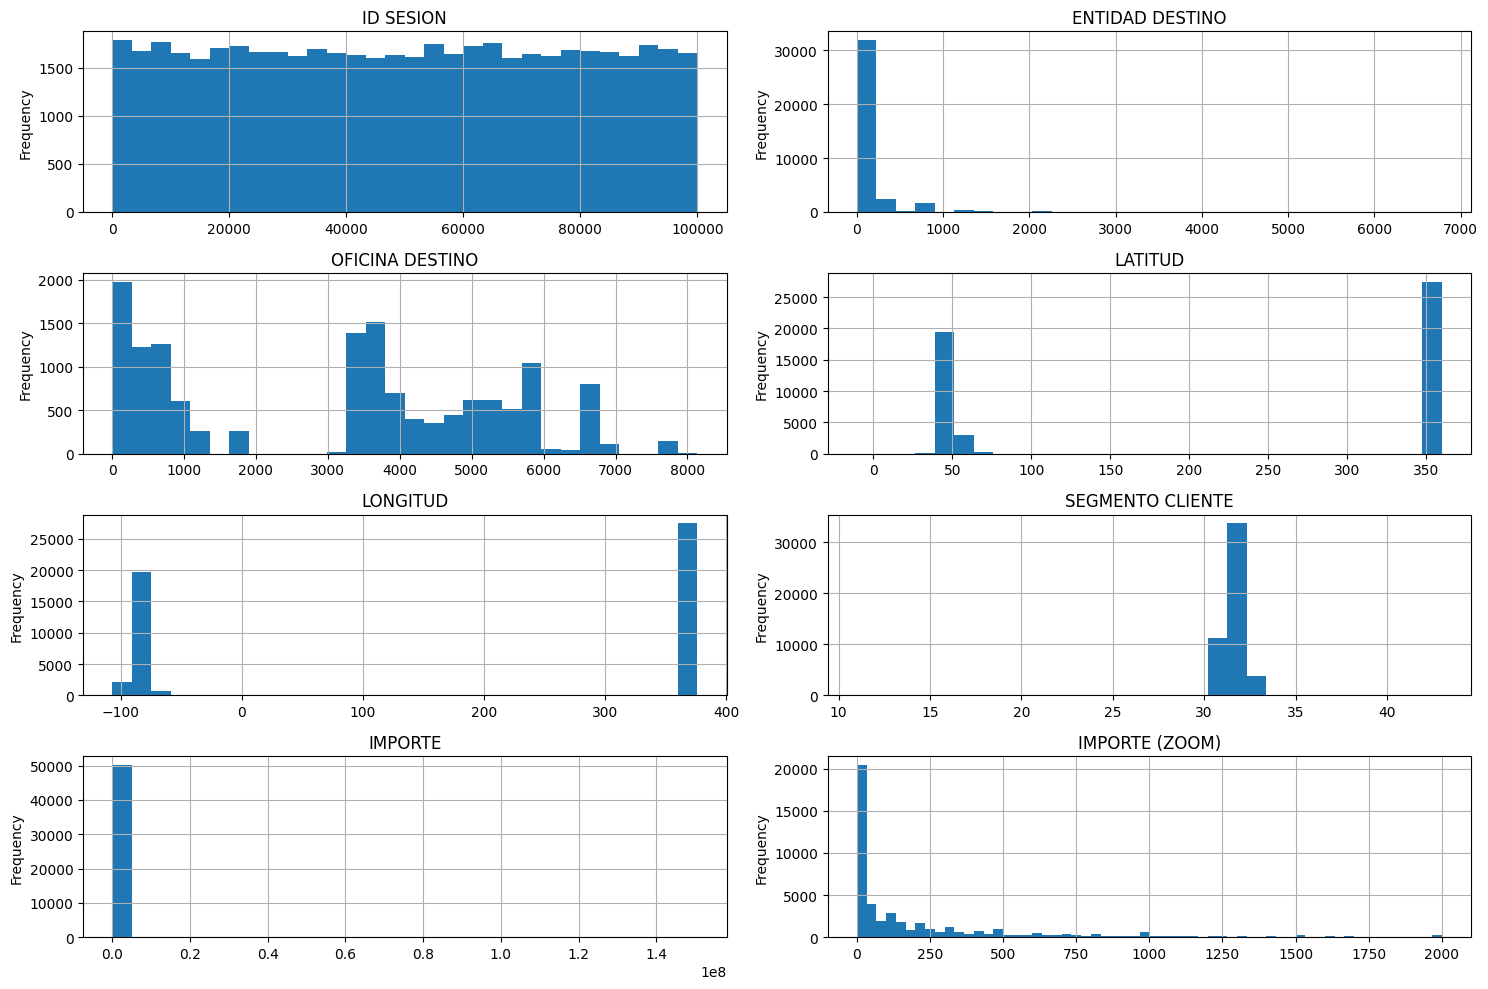

In [4]:
# Plot numerical data
numbers = ["ID SESION", "ENTIDAD DESTINO", "OFICINA DESTINO", "LATITUD", "LONGITUD", "SEGMENTO CLIENTE", "IMPORTE"]

fig, axes = plt.subplots(4,2, figsize=(15,10))
dff = df[df["IMPORTE"] <= 2000]

for i, ax in enumerate(axes.flat[0:7]):
    ax.hist(df[numbers[i]], bins=30)
    ax.set_title(numbers[i])
    ax.set_ylabel("Frequency")
    ax.grid(True)

# Zoom plot on IMPORTE
ax = axes.flat[7]
ax.hist(dff["IMPORTE"], bins=60)
ax.set_title("IMPORTE (ZOOM)")
ax.set_ylabel("Frequency")
ax.grid(True)

plt.tight_layout()
plt.show()

SEGMENTO field not plotted, it contains 0 values
ENTIDAD field not plotted, it contains 1 values
BROWSER field not plotted, it contains 1 values
BROWSER VERSION field not plotted, it contains 0 values
OS field not plotted, it contains 1 values
OS VERSION field not plotted, it contains 0 values
PROFESION CLIENTE field not plotted, it contains 0 values


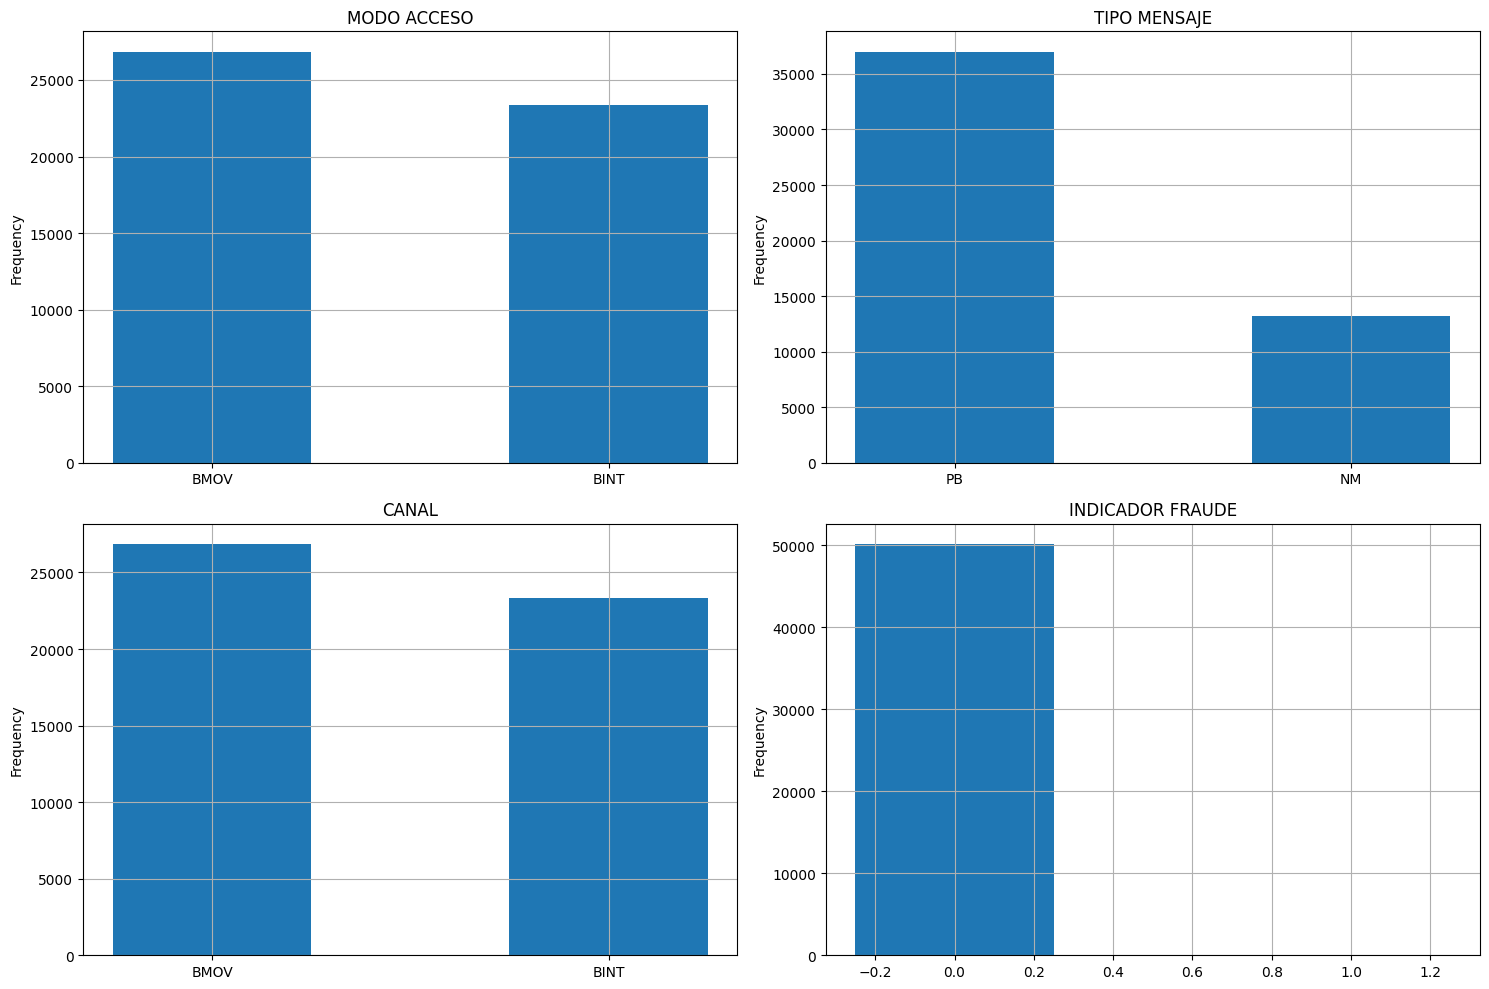

In [5]:
# Prepare plot data
cols = [c for c in df.columns if c not in (dates + hours + numbers)]

freqs : dict = {}
for col in cols:
    col_freqs = df.value_counts(col)
    values = list(col_freqs.keys())
    freqs[col] = [values, [col_freqs[v] for v in values]]

# Plot categorical data with few values
values = []
for col in freqs:
    if len(freqs[col][LABELS]) == 2:
        values.append(col)
        cols.remove(col)
    elif len(freqs[col][LABELS]) < 2: # Remove data with no relevant plot info
        print(f"{col} field not plotted, it contains {len(freqs[col][LABELS])} values")
        cols.remove(col)

fig, axes = plt.subplots(2,2, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    ax.bar(freqs[values[i]][LABELS], freqs[values[i]][VALUES], width=0.5)
    ax.set_title(values[i])
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [6]:
ncols = len(df.columns)
for i in range(0,ncols):
    for j in range(i+1,ncols):
        arr = (df[df.columns[i]] == df[df.columns[j]])
        narr = (df[df.columns[i]].isnull() & df[df.columns[j]].isnull())
        if df[df.columns[i]].nunique() > 0 and (arr | narr).all():
            print(f"Columns {df.columns[i]} and {df.columns[j]} have the same values!")

Columns FECHA TRANSACCION and FECHA SESION have the same values!
Columns HORA TRANSACCION and HORA SESION have the same values!
Columns MODO ACCESO and CANAL have the same values!
Columns FECHA ALTA CANAL and FECHA NAC TITU CTA CARGO have the same values!
Columns FECHA ACTIVACION CANAL and FECHA ALTA CTA CARGO have the same values!


CLIENTE ID field not plotted, it contains 7216 values
IP field not plotted, it contains 5813 values
OFICINA ORIGEN field not plotted, it contains 4179 values
CUENTA ORIGEN field not plotted, it contains 6879 values
CUENTA DESTINO field not plotted, it contains 19120 values
PAIS DESTINO field not plotted, it contains 101 values


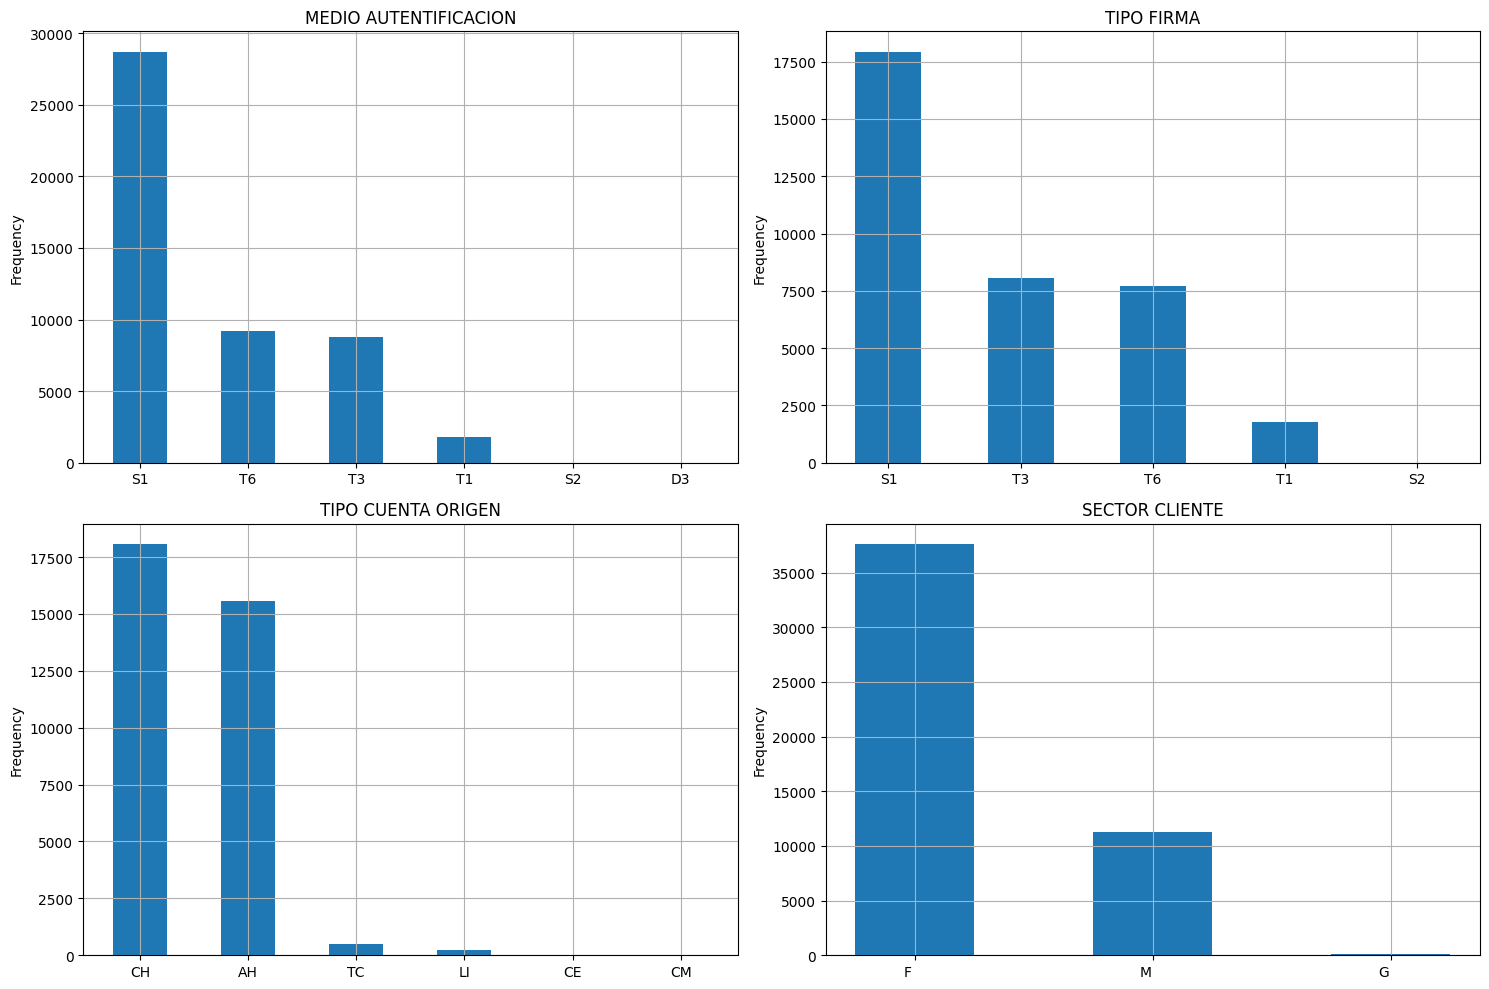

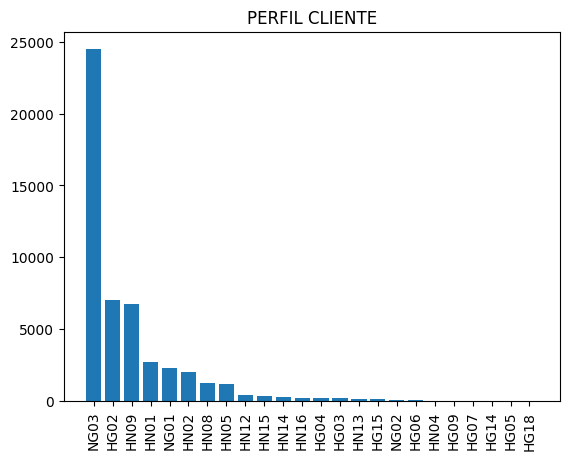

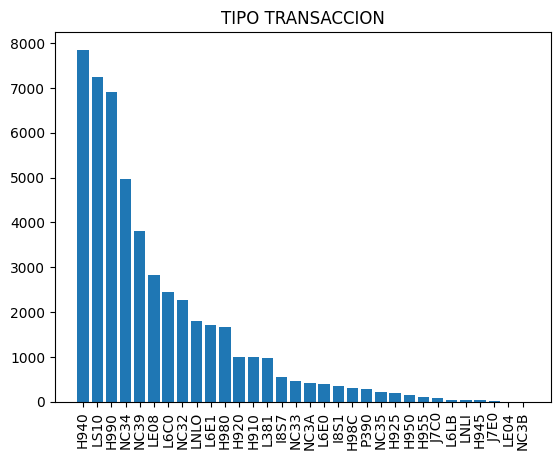

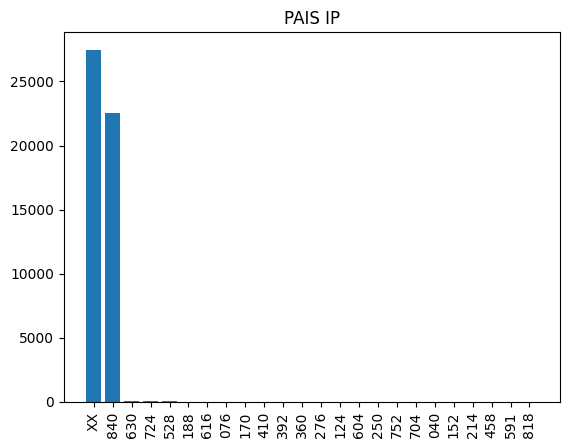

In [7]:
# Plot remaining categorical values
for col in cols: # Remove unreadable bar plots
    if len(freqs[col][LABELS]) > 100:
        print(f"{col} field not plotted, it contains {len(freqs[col][LABELS])} values")
        
fig, axes = plt.subplots(2,2, figsize=(15,10))
subcols = [col for col in cols if len(freqs[col][LABELS]) < 10]

# Plot regular data
for i, ax in enumerate(axes.flat):
    ax.bar(freqs[subcols[i]][LABELS], freqs[subcols[i]][VALUES], width=0.5)
    ax.set_title(subcols[i])
    ax.set_ylabel("Frequency")
    ax.grid(True)
    cols.remove(subcols[i])

plt.tight_layout()
plt.show()

# Plot larger data as separate images for readability
cols = [col for col in cols if len(freqs[col][LABELS]) <= 100]
for col in cols:
    plt.bar(freqs[col][LABELS], freqs[col][VALUES])
    plt.xticks(rotation=90)
    plt.title(f"{col}")
    plt.show()

## Ejercicio II - Estudio de Pares de Variables

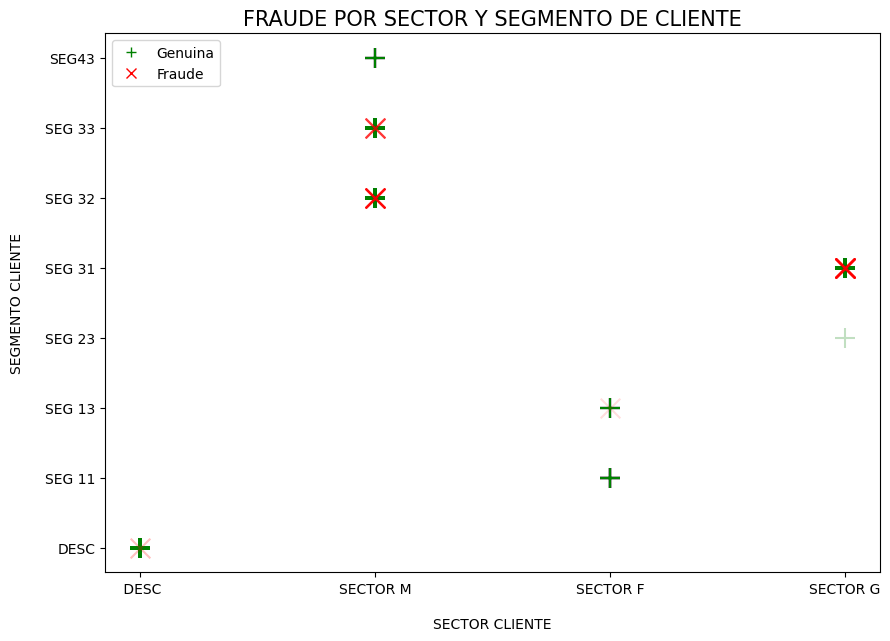

In [8]:
# Conversión de campos categóricos a numéricos
sec = pd.Categorical(df["SECTOR CLIENTE"]).codes
seg = pd.Categorical(df["SEGMENTO CLIENTE"]).codes

# Creación de subconjuntos según tipo de transacción
segfr = seg[df['INDICADOR FRAUDE'] == 1]
secfr = sec[df['INDICADOR FRAUDE'] == 1]
segok = seg[df['INDICADOR FRAUDE'] == 0]
secok = sec[df['INDICADOR FRAUDE'] == 0]

# Graficado de datos
plt.figure(figsize =(10, 7))
plt.xticks([-1,0,1,2], labels = ([" DESC","SECTOR M","SECTOR F","SECTOR G"]))
plt.yticks([-1,0,1,2,3,4,5,6],labels = (["DESC","SEG 11","SEG 13","SEG 23","SEG 31","SEG 32","SEG 33","SEG43"]))
plt.xlabel("SECTOR CLIENTE", labelpad=15)
plt.ylabel("SEGMENTO CLIENTE",labelpad=15)
plt.title(label="FRAUDE POR SECTOR Y SEGMENTO DE CLIENTE",fontsize=15, color="black")    
plt.scatter(secok, segok, c= "green", marker = "+", s=200, alpha=0.13) # Genuina
plt.scatter(secfr, segfr, c= "red", marker = "x", s=200, alpha=0.13)   # Fraude

plt.legend([Line2D([], [], color='green', marker='+', linestyle='None', markersize=7, alpha=1),
            Line2D([], [], color='red', marker='x', linestyle='None', markersize=7, alpha=1)],
           ["Genuina", "Fraude"], loc='upper left')

plt.show()

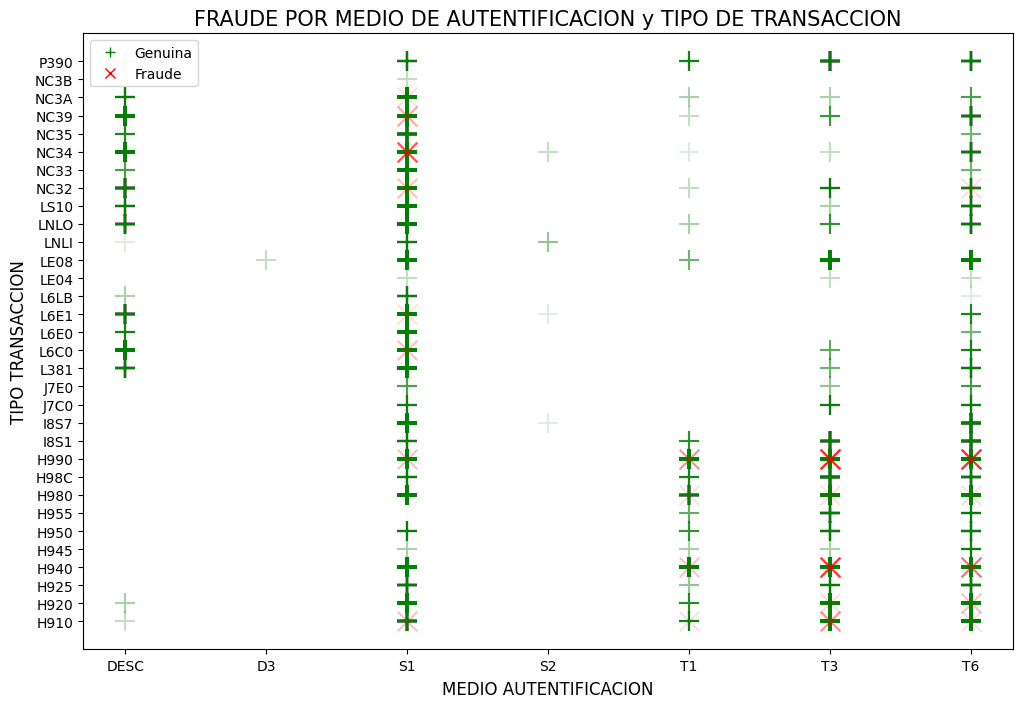

In [9]:
# Conversión de campos categóricos a numéricos
medaut = pd.Categorical(df["MEDIO AUTENTIFICACION"]).codes
tipotr = pd.Categorical(df["TIPO TRANSACCION"]).codes

# Creación de subconjuntos según tipo de transacción
medautfr = medaut[df['INDICADOR FRAUDE'] == 1]
tipotrfr = tipotr[df['INDICADOR FRAUDE'] == 1]
medautok = medaut[df['INDICADOR FRAUDE'] == 0]
tipotrok = tipotr[df['INDICADOR FRAUDE'] == 0]

# Graficado de datos
plt.figure(figsize =(12, 8))
plt.xlabel("MEDIO AUTENTIFICACION", labelpad=5,fontsize=12)
plt.ylabel("TIPO TRANSACCION",labelpad=5,fontsize=12)
plt.title(label="FRAUDE POR MEDIO DE AUTENTIFICACION y TIPO DE TRANSACCION",fontsize=15, color="black") 
plt.xticks([-1,0,1,2,3,4,5], labels = (['DESC','D3','S1','S2','T1','T3','T6']))
plt.yticks(np.arange(0,32,1), labels = (["H910","H920","H925","H940","H945","H950","H955","H980","H98C","H990","I8S1","I8S7","J7C0","J7E0","L381","L6C0","L6E0","L6E1","L6LB","LE04","LE08","LNLI","LNLO","LS10","NC32","NC33","NC34","NC35","NC39","NC3A","NC3B","P390"]))

plt.scatter(medautok, tipotrok, c= "green", marker = "+", s=200, alpha=0.13) # Genuina 
plt.scatter(medautfr, tipotrfr, c= "red", marker = "x", s=200, alpha=0.13) # Fraude
plt.legend([Line2D([], [], color='green', marker='+', linestyle='None', markersize=7, alpha=1),
            Line2D([], [], color='red', marker='x', linestyle='None', markersize=7, alpha=1)],
           ["Genuina", "Fraude"], loc='upper left')
plt.show()

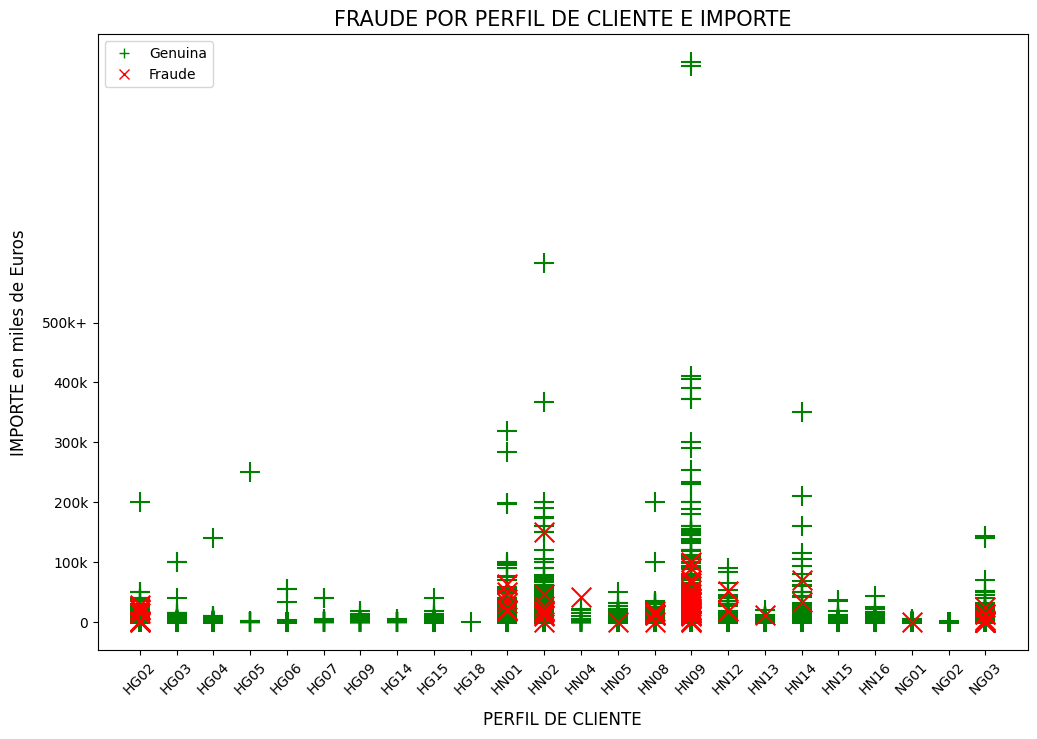

In [10]:
# Conversión de campos categóricos a numéricos
percli = pd.Categorical(df["PERFIL CLIENTE"]).codes

# Filtrado de outliers para evitar distorsión en el gráfico
importe = df["IMPORTE"] * (df["IMPORTE"] < 1_000_000)

# Creación de subconjuntos según tipo de transacción
perclifr = percli[df['INDICADOR FRAUDE'] == 1]
importefr = importe[df['INDICADOR FRAUDE'] == 1] 
percliok = percli[df['INDICADOR FRAUDE'] == 0] 
importeok = importe [df['INDICADOR FRAUDE'] == 0]

# Graficado de datos
plt.figure(figsize =(12, 8))
plt.title(label="FRAUDE POR PERFIL DE CLIENTE E IMPORTE",fontsize=15, color="black") 
plt.xlabel("PERFIL DE CLIENTE", labelpad=10,fontsize=12)
plt.ylabel("IMPORTE en miles de Euros", labelpad=10,fontsize=12)
plt.xticks(np.arange(0,24,1),rotation=45, labels = (["HG02","HG03","HG04","HG05","HG06","HG07","HG09","HG14","HG15","HG18","HN01","HN02","HN04","HN05","HN08","HN09","HN12","HN13","HN14","HN15","HN16","NG01","NG02","NG03"]))
plt.yticks(np.arange(1,600000,100000), labels=(['0','100k','200k','300k','400k','500k+']))

plt.scatter(percliok,importeok, c= "green", marker = "+", s=200) # Genuina 
plt.scatter(perclifr,importefr, c= "red", marker = "x", s=200) # Fraude

plt.legend([Line2D([], [], color='green', marker='+', linestyle='None', markersize=7, alpha=1),
            Line2D([], [], color='red', marker='x', linestyle='None', markersize=7, alpha=1)],
           ["Genuina", "Fraude"], loc='upper left')

plt.show()

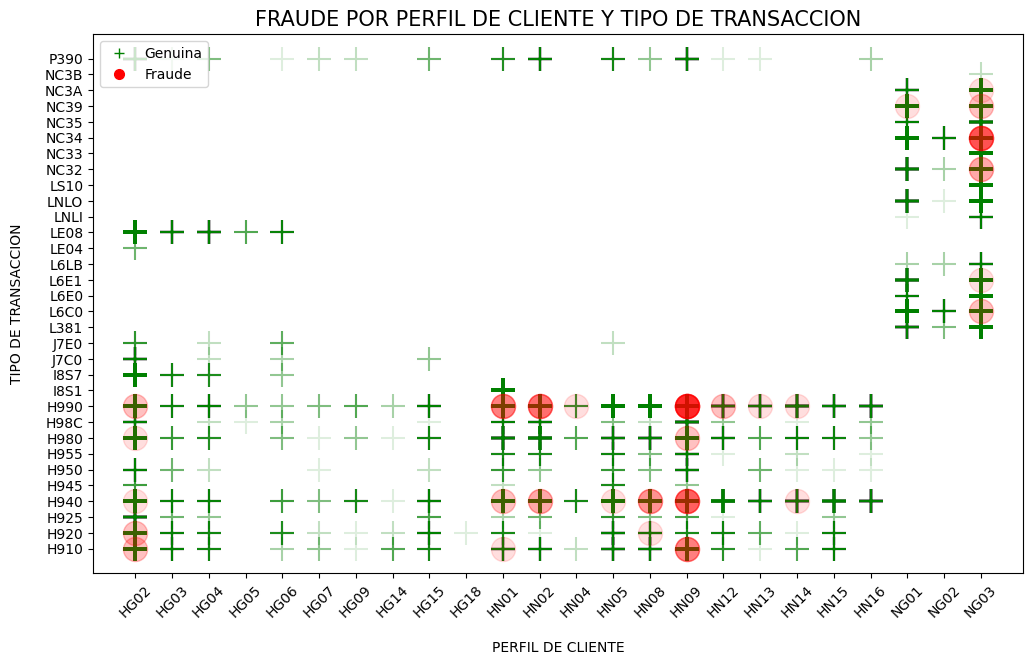

In [11]:
# Conversión de campos categóricos a numéricos
percli = pd.Categorical(df["PERFIL CLIENTE"]).codes
tipotr = pd.Categorical(df["TIPO TRANSACCION"]).codes

# Creación de subconjuntos según tipo de transacción
percliok= percli[df['INDICADOR FRAUDE'] == 0]
tipotrok= tipotr[df['INDICADOR FRAUDE'] == 0]
perclifr= percli[df['INDICADOR FRAUDE'] == 1]
tipotrfr = tipotr[df['INDICADOR FRAUDE'] == 1]

# Graficado de datos
plt.figure(figsize =(12, 7))
plt.xticks(np.arange(0,24,1),rotation=45, labels = (["HG02","HG03","HG04","HG05","HG06","HG07","HG09","HG14","HG15","HG18","HN01","HN02","HN04","HN05","HN08","HN09","HN12","HN13","HN14","HN15","HN16","NG01","NG02","NG03"]))
plt.yticks(np.arange(0,32,1), labels = (["H910","H920","H925","H940","H945","H950","H955","H980","H98C","H990","I8S1","I8S7","J7C0","J7E0","L381","L6C0","L6E0","L6E1","L6LB","LE04","LE08","LNLI","LNLO","LS10","NC32","NC33","NC34","NC35","NC39","NC3A","NC3B","P390"]))
plt.xlabel("PERFIL DE CLIENTE", labelpad=15)
plt.ylabel("TIPO DE TRANSACCION",labelpad=15)
plt.title(label="FRAUDE POR PERFIL DE CLIENTE Y TIPO DE TRANSACCION",fontsize=15, color="black")    

plt.scatter(percliok, tipotrok, c= "green", marker = "+", s=300, alpha=0.13) # Genuina
plt.scatter(perclifr, tipotrfr, c= "red", marker = "o", s=300, alpha=0.13) # Fraude

plt.legend([Line2D([], [], color='green', marker='+', linestyle='None', markersize=7, alpha=1),
            Line2D([], [], color='red', marker='o', linestyle='None', markersize=7, alpha=1)],
           ["Genuina", "Fraude"], loc='upper left')
plt.show()

## Ejercicio III - Entrenamiento del Modelo

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

to_drop = ["SEGMENTO", "ENTIDAD", "BROWSER", "BROWSER VERSION", "OS", "OS VERSION", "PROFESION CLIENTE", "FECHA SESION", "FECHA NAC TITU CTA CARGO", "FECHA ALTA CTA CARGO", "HORA SESION", "CANAL"]
dfc = df.drop(columns=to_drop)

# A: Probablilidad a priori de ser fraude
priori_fraude = np.count_nonzero(dfc["INDICADOR FRAUDE"]) / np.size(dfc["INDICADOR FRAUDE"])

# Prepare training data with defined state 42 to reproduce results
x = dfc.drop(columns=["INDICADOR FRAUDE"])
y = dfc["INDICADOR FRAUDE"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# B: Clasificador con probabilidad a priori (stratified)
strat_classifier = DummyClassifier(strategy='stratified')
strat_classifier.fit(xtrain, ytrain)
strat_pred = strat_classifier.predict(xtest)

# C: Clasificador con clase más probable
freq_classifier = DummyClassifier(strategy='most_frequent')
freq_classifier.fit(xtrain,ytrain)
freq_pred = freq_classifier.predict(xtest)

print(priori_fraude)
np.sum(strat_pred), np.sum(freq_pred)

0.001634247448979592


(np.int64(16), np.int64(0))

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# D: Metricas de ambos clasificadores

class ClassifierMetrics():
    def __init__(self, name, pred, test):
        self.name = name
        self.pred = pred
        self.test = test
    def measure(self):
        matrix = confusion_matrix(self.test, self.pred)
        tn, fp, fn, tp = matrix.ravel()
        accuracy = (tp+tn)/(tp+fp+fn+tn)
        tpr = (tp)/(tp+fn)
        tnr = (tn)/(tn+fp)
        balanced_accuracy = (tpr + tnr)/2
        print(f"Metrics for {self.name} dummy classifier:")
        print(f"\t- Accuracy: {accuracy}")
        print(f"\t- Sensitivity (TPR): {tpr}")
        print(f"\t- Specificity (TNR): {tnr}")
        print(f"\t- Balanced Accuracy: {balanced_accuracy}")
        print(f"\t- Additional Metrics: {tp} (TP), {tn} (TN), {fp} (FP), {fn} (FN)")
        return matrix
        
strat_matrix = ClassifierMetrics('stratified', strat_pred, ytest).measure()
freq_matrix =ClassifierMetrics('most frequent', freq_pred, ytest).measure()

Metrics for stratified dummy classifier:
	- Accuracy: 0.9964129135113591
	- Sensitivity (TPR): 0.0
	- Specificity (TNR): 0.9984025559105432
	- Balanced Accuracy: 0.4992012779552716
	- Additional Metrics: 0 (TP), 10000 (TN), 16 (FP), 20 (FN)
Metrics for most frequent dummy classifier:
	- Accuracy: 0.9980071741729772
	- Sensitivity (TPR): 0.0
	- Specificity (TNR): 1.0
	- Balanced Accuracy: 0.5
	- Additional Metrics: 0 (TP), 10016 (TN), 0 (FP), 20 (FN)


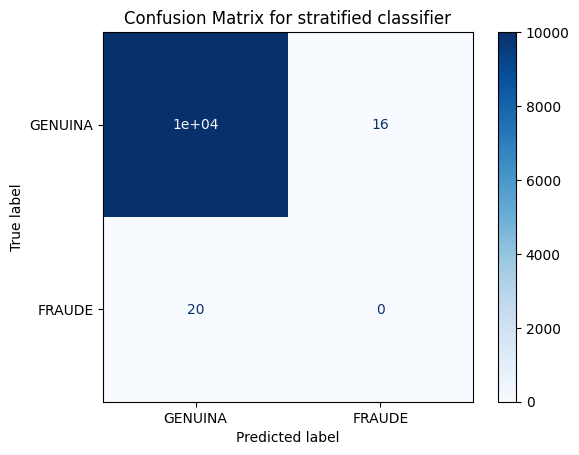

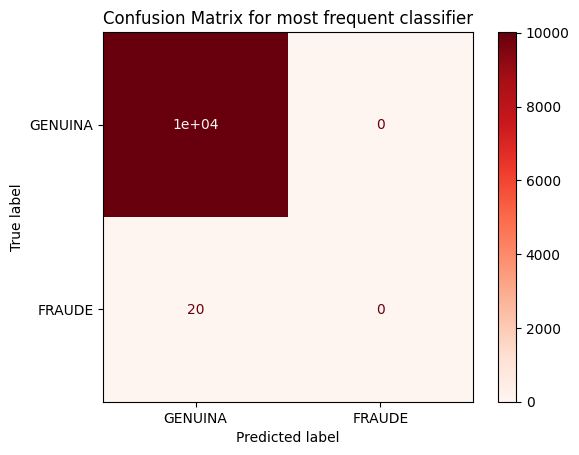

In [14]:
disp = ConfusionMatrixDisplay(strat_matrix, display_labels=["GENUINA", "FRAUDE"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for stratified classifier")
plt.show()
disp = ConfusionMatrixDisplay(freq_matrix, display_labels=["GENUINA", "FRAUDE"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix for most frequent classifier")
plt.show()